In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
from sklearn.multiclass import OneVsRestClassifier

In [8]:
from sklearn import metrics

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
from pandas.plotting import scatter_matrix

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn import metrics

In [13]:
resumeDataSet = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [14]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())


Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [15]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


In [16]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Category'>

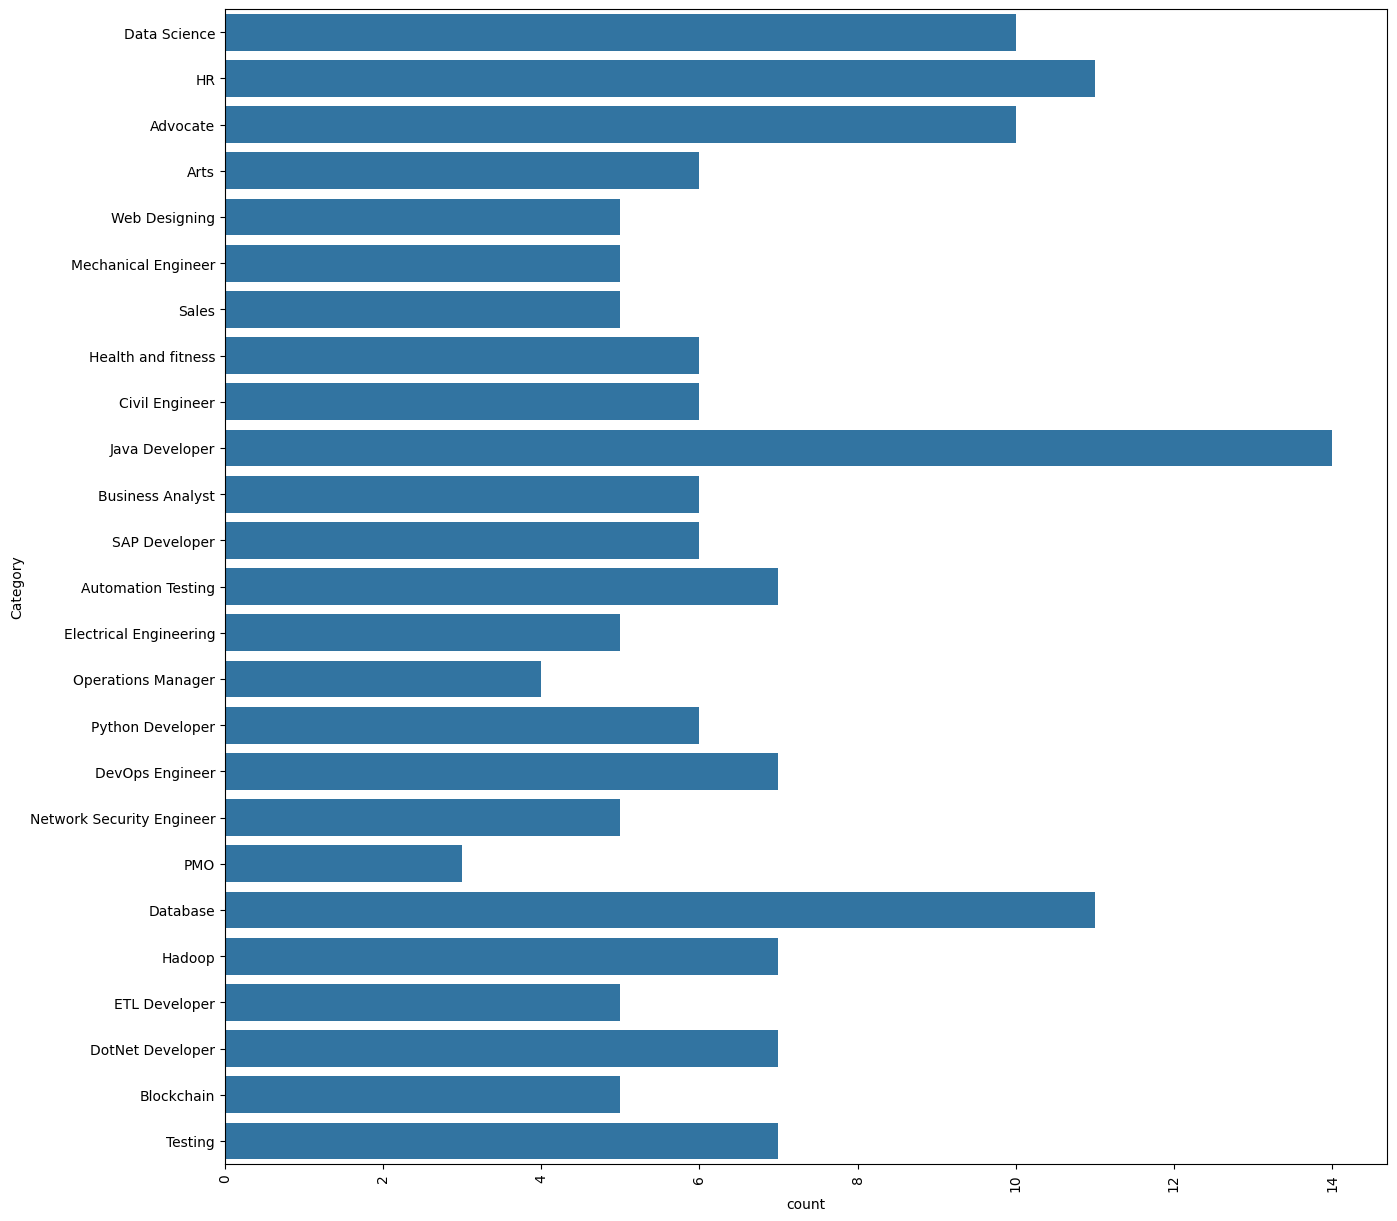

In [17]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

In [18]:
from matplotlib.gridspec import GridSpec

In [19]:
import tkinter as tk
import csv
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd

class ResumeScreeningWindow:
    def __init__(self, master):
        self.master = master
        master.title("Resume Screening")
        master.geometry("700x700")
        master.configure(bg="#f4f4f9")

        # Create frames
        self.left_frame = tk.Frame(master, width=200, height=700, bg="#2d2d2d")
        self.left_frame.pack(side=tk.LEFT, fill=tk.Y)

        self.center_frame = tk.Frame(master, width=500, height=700, bg="#ffffff")
        self.center_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

        self.top_frame = tk.Frame(master, width=700, height=50, bg="#2d2d2d")
        self.top_frame.pack(side=tk.TOP, fill=tk.X)

        # Create widgets
        self.resume_listbox = tk.Listbox(self.left_frame, width=30, height=40, bg="#f0f0f0", font=("Arial", 12), bd=0, selectmode=tk.SINGLE)
        self.resume_listbox.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

        self.resume_label = tk.Label(self.center_frame, text="Resume Screening", font=("Arial", 24, "bold"), bg="#ffffff", fg="#333333")
        self.resume_label.pack(side=tk.TOP, fill=tk.X, pady=10)

        self.target_resume_text = tk.Text(self.center_frame, width=60, height=35, wrap=tk.WORD, font=("Arial", 12), bg="#ffffff", bd=1, relief=tk.SUNKEN)
        self.target_resume_text.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=10, pady=10)

        self.search_frame = tk.Frame(self.top_frame, bg="#2d2d2d")
        self.search_frame.pack(side=tk.TOP, fill=tk.X, padx=10, pady=5)

        self.search_entry = tk.Entry(self.search_frame, width=50, font=("Arial", 12), bd=0, relief=tk.FLAT)
        self.search_entry.pack(side=tk.LEFT, fill=tk.X, padx=10)

        self.search_button = tk.Button(self.search_frame, text="Search", font=("Arial", 12, "bold"), command=self.search_resumes, bg="#007bff", fg="#ffffff", bd=0, relief=tk.FLAT)
        self.search_button.pack(side=tk.LEFT, padx=10)

        self.pie_chart_frame = tk.Frame(self.center_frame, bg="#ffffff")
        self.pie_chart_frame.pack(side=tk.TOP, fill=tk.X, pady=10)

        self.show_category_distribution()

        # Load resumes from CSV
        self.resume_list, self.resume_text_list = self.load_resumes_from_csv('resume_dataset.csv')
        for resume in self.resume_list:
            self.resume_listbox.insert(tk.END, resume)

        # Set default text in search entry
        self.search_entry.insert(tk.END, "Search resumes...")

        # Bind Enter key to the search function
        self.master.bind('<Return>', self.search_resumes_event)

        # Display the first resume in the text area
        self.target_resume_text.delete(1.0, tk.END)
        self.target_resume_text.insert(tk.END, self.resume_text_list[0])

    def load_resumes_from_csv(self, file_path):
        resumes = []
        resume_texts = []
        resume_set = set()
        try:
            with open(file_path, mode='r', newline='', encoding='utf-8') as file:
                reader = csv.reader(file)
                for row in reader:
                    if row:  # Check if the row is not empty
                        resume = row[0]
                        if resume not in resume_set:
                            resumes.append(resume)  # Assuming resumes are in the first column
                            resume_texts.append('\n'.join(row))  # Store the full resume text
                            resume_set.add(resume)
        except FileNotFoundError:
            print(f"File {file_path} not found.")
        except Exception as e:
            print(f"An error occurred: {e}")
        return resumes, resume_texts

    def search_resumes(self):
        # Get search keyword
        keyword = self.search_entry.get()

        # Filter resumes based on keyword
        filtered_resumes = [(resume, text) for                             resume, text in zip(self.resume_list, self.resume_text_list) 
                            if keyword.lower() in resume.lower() or keyword.lower() in text.lower()]

        # Clear and update resume listbox
        self.resume_listbox.delete(0, tk.END)
        for resume, _ in filtered_resumes:
            self.resume_listbox.insert(tk.END, resume)

        # Update the text area with the selected resume
        self.target_resume_text.delete(1.0, tk.END)
        if filtered_resumes:
            self.target_resume_text.insert(tk.END, filtered_resumes[0][1])

        # Update the pie chart
        self.update_category_distribution()

    def search_resumes_event(self, event):
        self.search_resumes()

    def show_category_distribution(self):
        # Create a new figure and axis
        fig = plt.Figure(figsize=(5,4), dpi=100)
        ax = fig.add_subplot(111)

        # Create the pie chart
        resumeDataSet = pd.read_csv('resume_dataset.csv')
        targetCounts = resumeDataSet['Category'].value_counts()
        targetLabels = resumeDataSet['Category'].unique()
        cmap = plt.get_cmap('coolwarm')
        colors = [cmap(i) for i in np.linspace(0,1, len(targetLabels))]
        ax.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
        ax.set_title('CATEGORY DISTRIBUTION')

        # Create a Tkinter canvas to display the chart
        canvas = FigureCanvasTkAgg(fig, master=self.pie_chart_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True, anchor=tk.CENTER)

    def update_category_distribution(self):
    # Clear the pie chart frame
        for widget in self.pie_chart_frame.winfo_children():
            widget.destroy()
        
        # Show the new pie chart
        self.show_category_distribution()

root = tk.Tk()
my_window = ResumeScreeningWindow(root)
root.mainloop()

In [20]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [21]:
import nltk
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import pandas as pd
resumeDataSet = pd.read_csv('resume_dataset.csv')


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""


def cleanResume(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence)
    cleaned_tokens = [word for word in tokens if word.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)
requiredWords = nltk.word_tokenize(cleanedText)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'word_tokenize' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))